In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas_profiling as pp
from pandas_profiling import ProfileReport

C:\Users\Latte\AppData\Local\Temp\ipykernel_14408\2490565462.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#pandas profiling
#profile = ProfileReport(df, title='Marketing_Campaign', html={'style':{'full_width':True}})
#profile.to_file("marketing_campaign.html")

In [5]:
#profile

In [6]:
df.drop(['Z_CostContact','Z_Revenue','AcceptedCmp2'], axis=1, inplace=True)

In [7]:
df.drop(['ID'], axis=1, inplace=True)

<AxesSubplot:>

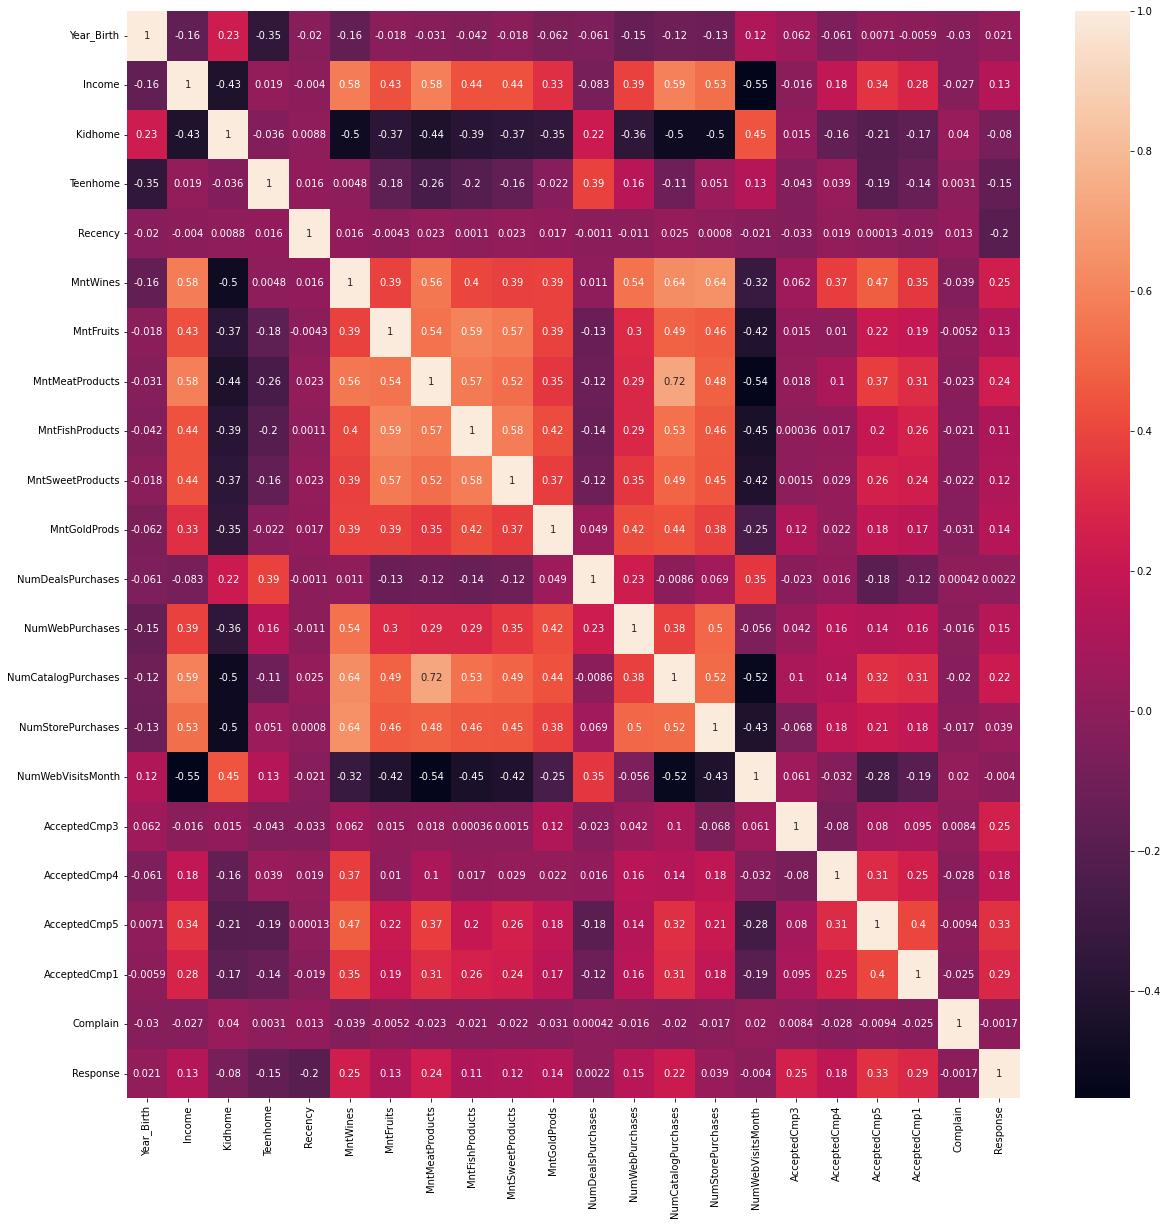

In [8]:
corr = df.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [9]:
#impute missing values Income column
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [10]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Dt_Customer'] = le.fit_transform(df['Kidhome'])

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['Response'], axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8616071428571429

In [16]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\Latte\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Latte\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Latte\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:44:57] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
xgb_pred = xgb_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))

from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)
cm_xgb
px.imshow(cm_xgb, text_auto=True)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       379
           1       0.66      0.39      0.49        69

    accuracy                           0.88       448
   macro avg       0.78      0.68      0.71       448
weighted avg       0.86      0.88      0.86       448



In [19]:
accuracy_score(y_test, xgb_pred)

0.875

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       379
           1       0.66      0.39      0.49        69

    accuracy                           0.88       448
   macro avg       0.78      0.68      0.71       448
weighted avg       0.86      0.88      0.86       448

